In [ ]:
!gdown 101_VRJU4I2KGRIGOoyaKIGMunHL7w0R2

Downloading...
From: https://drive.google.com/uc?id=101_VRJU4I2KGRIGOoyaKIGMunHL7w0R2
To: /content/data-sampah.zip
100% 223M/223M [00:04<00:00, 51.1MB/s]


In [ ]:
import zipfile
local_zip = './data-sampah.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

!ls

data-sampah  data-sampah.zip  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_dir = '/content/data-sampah/DATASET/TRAIN'
test_dir = '/content/data-sampah/DATASET/TEST'

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   rescale=1./255,
                                   validation_split=0.2)


val_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split=0.5)

In [ ]:
Batch_size = 32

train_set = train_datagen.flow_from_directory(train_dir, class_mode='binary',
                                              batch_size = Batch_size,
                                              target_size=(64, 64))


val_set = val_datagen.flow_from_directory(test_dir, class_mode='binary',
                                          batch_size = Batch_size,
                                          target_size=(64, 64),
                                          subset= 'training')
   

test_set = val_datagen.flow_from_directory(test_dir, class_mode = 'binary',
                                           batch_size = Batch_size, 
                                           target_size=(64, 64),
                                           subset= 'validation')

Found 22564 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Found 1256 images belonging to 2 classes.


In [ ]:
train_set.image_shape

(64, 64, 3)

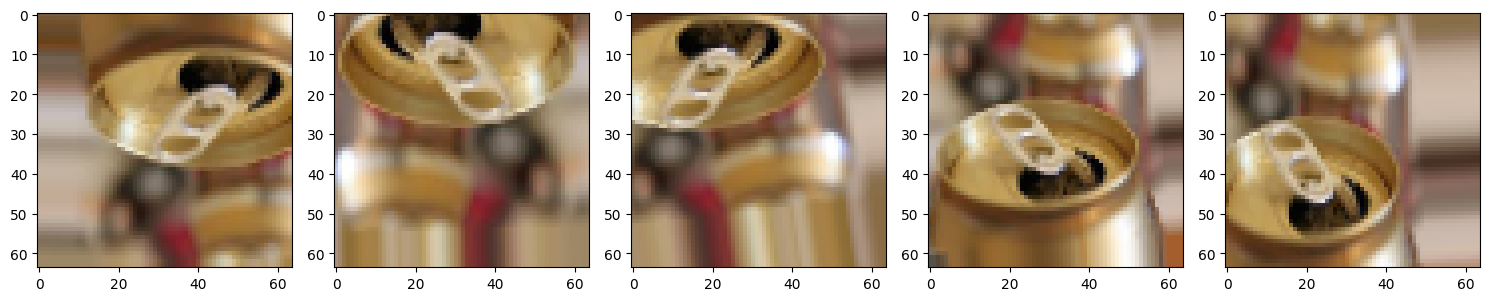

In [ ]:
def Images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_img = [train_set[0][0][0] for i in range(5)]
Images(augmented_img)
     

In [ ]:
model = Sequential([                
  Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  MaxPool2D((2,2)),
  Conv2D(32, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Conv2D(64, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(units=128, activation="relu"),
  Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
history = model.fit(
    train_set,
    epochs = 5,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/5
22/22 [==============================] - 12s 503ms/step - loss: 0.7120 - accuracy: 0.4957 - val_loss: 0.6021 - val_accuracy: 0.5577
Epoch 2/5
22/22 [==============================] - 12s 570ms/step - loss: 0.5616 - accuracy: 0.7102 - val_loss: 0.4960 - val_accuracy: 0.7876
Epoch 3/5
22/22 [==============================] - 13s 610ms/step - loss: 0.5624 - accuracy: 0.7443 - val_loss: 0.4500 - val_accuracy: 0.8298
Epoch 4/5
22/22 [==============================] - 11s 501ms/step - loss: 0.4375 - accuracy: 0.8026 - val_loss: 0.4483 - val_accuracy: 0.8298
Epoch 5/5
22/22 [==============================] - 12s 569ms/step - loss: 0.4716 - accuracy: 0.7784 - val_loss: 0.4208 - val_accuracy: 0.8369


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

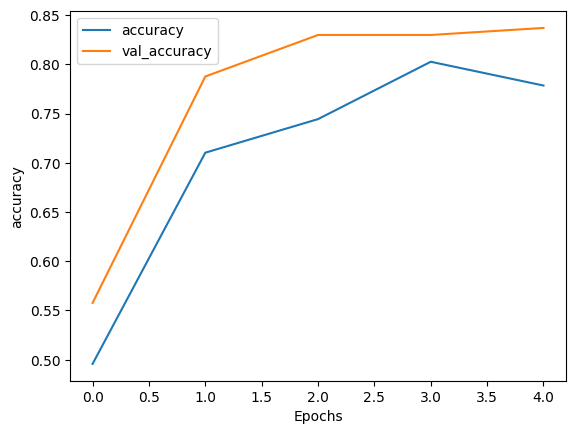

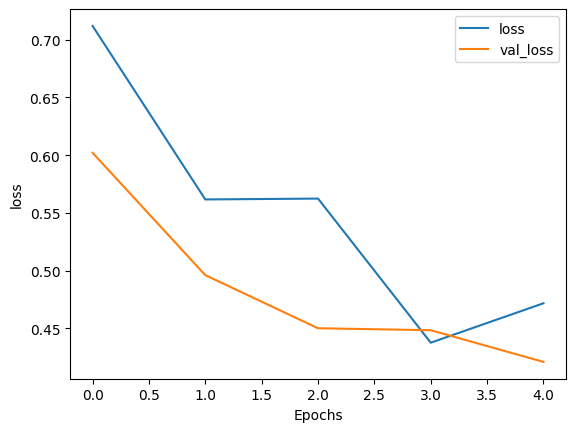

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8957


In [ ]:
# save the model
model.save("waste_CNN_model.h5")

In [ ]:
model2 = Sequential([
   Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(32, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(64, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(128, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Flatten(),
   Dense(64, activation="relu"),
   Dense(32, activation="relu"),
   Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)        

In [ ]:
history_2 = model2.fit(
    train_set,
    epochs = 10,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/10
22/22 [==============================] - 15s 608ms/step - loss: 0.6858 - accuracy: 0.5469 - val_loss: 0.6375 - val_accuracy: 0.5577
Epoch 2/10
22/22 [==============================] - 11s 518ms/step - loss: 0.5224 - accuracy: 0.7230 - val_loss: 0.5351 - val_accuracy: 0.8433
Epoch 3/10
22/22 [==============================] - 13s 596ms/step - loss: 0.4836 - accuracy: 0.7969 - val_loss: 0.4418 - val_accuracy: 0.8067
Epoch 4/10
22/22 [==============================] - 11s 512ms/step - loss: 0.5199 - accuracy: 0.7585 - val_loss: 0.4543 - val_accuracy: 0.8162
Epoch 5/10
22/22 [==============================] - 11s 506ms/step - loss: 0.4609 - accuracy: 0.7770 - val_loss: 0.4711 - val_accuracy: 0.8178
Epoch 6/10
22/22 [==============================] - 11s 493ms/step - loss: 0.4812 - accuracy: 0.7855 - val_loss: 0.3956 - val_accuracy: 0.8473
Epoch 7/10
22/22 [==============================] - 11s 517ms/step - loss: 0.4700 - accuracy: 0.7955 - val_loss: 0.4671 - val_accuracy: 0.8043

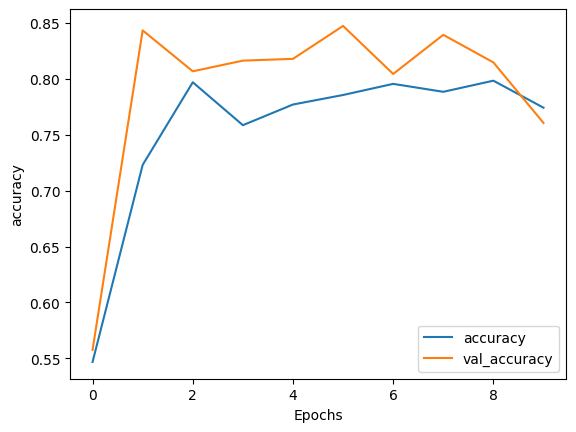

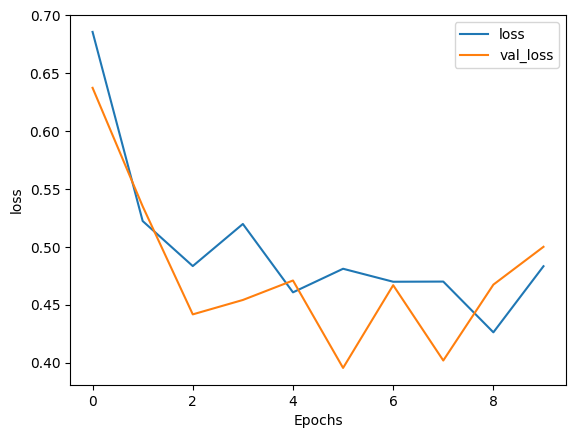

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [ ]:
loss, accuracy = model2.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.7667


In [ ]:
# save the model
model2.save("waste_CNN_model2.h5")

In [ ]:
# add the image path
test_image = image.load_img('/content/tes-fix.jpg', target_size = (64, 64))

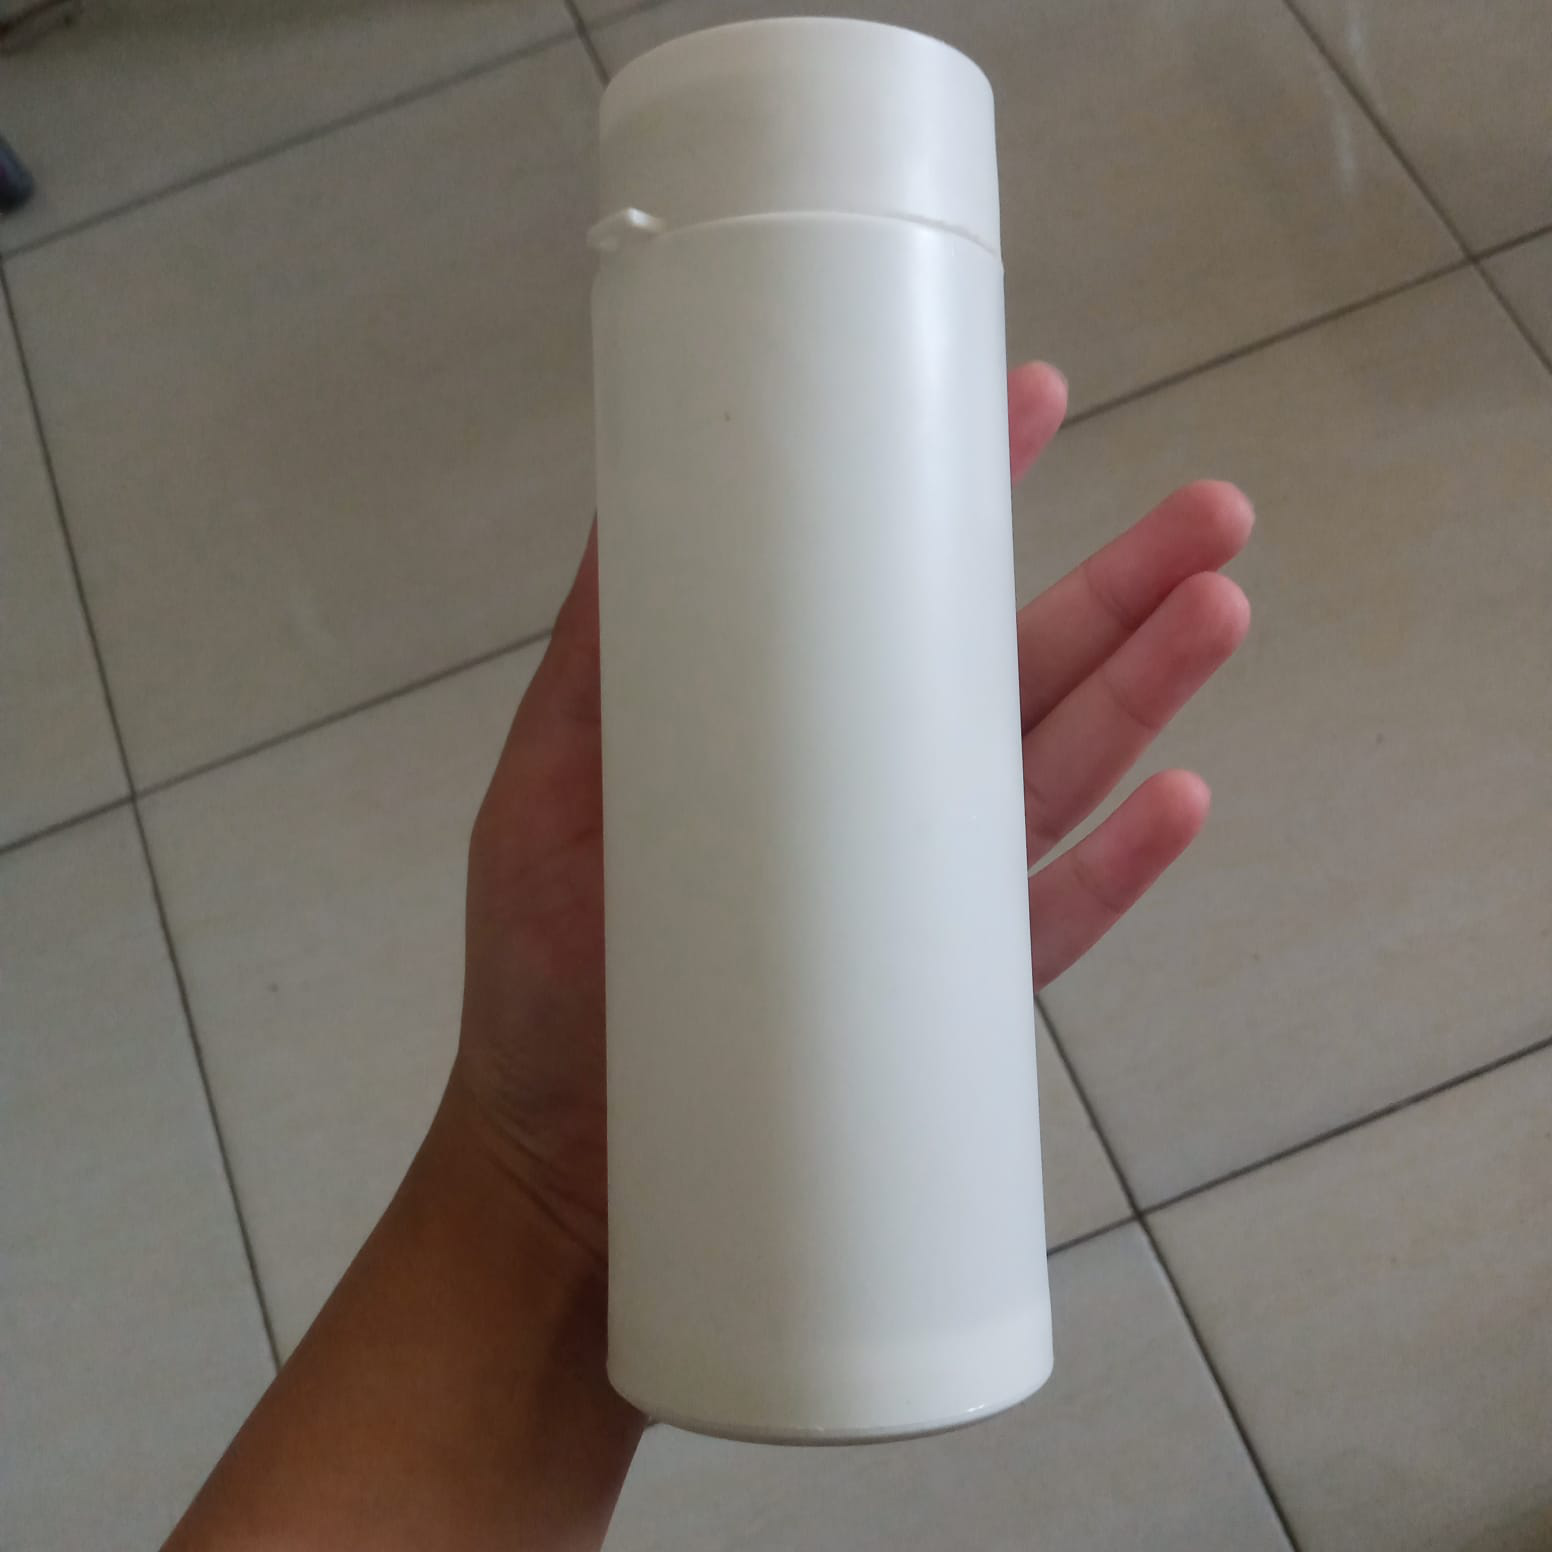

In [ ]:
Image.open('/content/tes-fix.jpg')

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# prediction
result = model.predict(test_image)

1/1 [==============================] - 0s 200ms/step


In [ ]:
# dataset class index
train_set.class_indices
    

{'O': 0, 'R': 1}

In [ ]:
print(result)

[[1.]]


In [ ]:
if result[0][0] == 1:
    prediction = 'Recyclable Waste'
else:
    prediction = 'Organic Waste'

In [ ]:
print(prediction)

Recyclable Waste
